# Homework 11 - Nonlinear equations Daniel Teeuwsen

#### Excercise 1

Write a function called `bisection_method` that takes as arguments
-  a function to find the root of,
-  the guesses $a,b$, and
-  a tolerance limit with a default value of `1E-6`.

The function should return the root and the uncertainty of the root as $|a-b|$.

Use that function to solve find the roots of the quadratic equation
$$x^2-3x+2=0$$ 

In [1]:
%matplotlib inline
import numpy as np
import scipy.misc
import scipy.optimize
import matplotlib.pyplot as plt

First root:              Uncertainty:
(0.9999993324279786, 8.583068846768072e-07)


Second root:             Uncertainty:
(2.000000476837158, 6.675720214399661e-07)


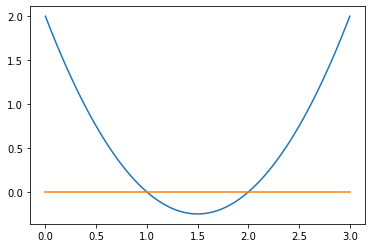

In [213]:
def bisection_method(f,a,b,tol=1E-6):
    
    if f(a)==0:
        return a, 0
    elif f(b)==0:
        return b, 0
    elif f(a)*f(b)>0: #if a and b have same sign
        return 
    
    epsilon = np.abs(a-b)

    while epsilon > tol:
        x = (a+b)/2
        if f(x) == 0:
            break
        if f(x)*f(a)>0:   #if x and a have same sign
            a = x
        else:
            b = x
        epsilon = np.abs(a-b)
        
    return x , epsilon

def f(x):             #function given in question
    return x*x-3*x+2


plt.plot(np.linspace(0,3,100),f(np.linspace(0,3,100)))
plt.plot(np.linspace(0,3,100),np.zeros(100))

print('First root:              Uncertainty:')
print(bisection_method(f,0.6,1.5))
print('\n')
print('Second root:             Uncertainty:')
print(bisection_method(f,1.6,2.3))

#### Excercise 2

Plank's radiation law says that the intensity of radiation per unit area and per unit wavelength $\lambda$ from a black body at temperature $T$ is 
$$I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_BT}-1}$$

By differentiation we can show that the wavelength at which emitted radiation is maximum is the solution to the equation
$$5e^{hc/\lambda k_BT}+\frac{hc}{\lambda k_BT}-5=0$$

When you substitute $x=hc/\lambda k_BT$, then the wavelength of maximum  radiation is given by Wein's displacment law
$$\lambda=\frac{b}{T}$$
where $b=hc/\lambda k_Bx$.

- Use [`scipy.optimize.bisect`][1] and solve the equtation for $x$, then using that value, find the temperature of the sun, whose maximum in intensity is at $\lambda=502$ nm

- Write **your own** Newton's method to solve the equtation for $x$, then using that value, find the temperature of the sun, whose maximum in intensity is at $\lambda=502$ nm. (**Bonus 2 points.** Your starting guess should be more than 1.69. Why?)


[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html

x = 4.965114231743428
Temperature of the sun: 5772.454093995354
5772.454093625498


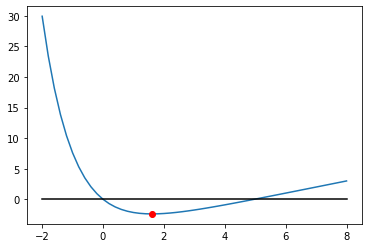

In [214]:
def f(x):
    return 5*np.exp(-x)+x-5

def fp(x):
    return -5*np.exp(-x)+1

plt.plot(np.linspace(-2,8,51),f(np.linspace(-2,8,51)))          #Plot function and x axis
plt.plot(np.linspace(-2,8,51),np.zeros(51),color='black')
plt.plot(1.609,-2.391,'ro')                                     #minimum where derivative=0
#plt.plot(np.linspace(-2,8,51),fp(np.linspace(-2,8,51)))        #fprime 

x1 = scipy.optimize.bisect(f,-1,1)  # root 1

x = scipy.optimize.bisect(f,4,6)    # root 2 (useful one)
print('x = '+str(x))

sunLambda = 502*10**(-9) # m meters
b = 2.897771955*10**(-3) # m*k Wien's displacement constant
h = 6.62607015*10**(-34) # J*s
c = 299792458            # ms^-1
KB = 1.380649*10**(-23)  # J*k^-1

# Rearranging, T = h*c / ( lambda*KB*x)

print('Temperature of the sun: ' + str((h*c)/(sunLambda*KB*x)))
#print(b/sunLambda) can be verified or by checking wiki

In [212]:
def myNewton(f,fp,x0,tol=1e-7,eps=1e-14,maxIter=25):
    
    for i in range(maxIter):
        y = f(x0)
        yp = fp(x0) 
        
        if yp < eps:
            return 'error: derivative too small'
            break
            
        xi = x0-y/yp
        
        if np.abs(xi-x0) < tol:
            return xi
            break
        x0 = xi
        
print(myNewton(f,fp,0.3))  # root 1 not found
print(myNewton(f,fp,2))    # root 2
print(myNewton(f,fp,1.609)) 
print('\n')
print('Temperature of the sun: ' + str((h*c)/(sunLambda*KB*myNewton(f,fp,2))))

error: derivative too small
4.965114231744276
error: derivative too small


Temperature of the sun: 5772.454093994367


<font color="blue"><b>Bonus:</b> </font> This is the minimum point ie. where the derivative is 0. Any value before this point will result in dividing by approx. 0. 

#### Exercise 3

Use Newton's method to take the inverse of $u=\tanh{x}$, that is for a given $u$, calculate $\tanh^{-1}{u}=x$. Clearly this is the root of $f(x)=\tanh(x)-u$ where $u$ is a constant.

-  Include the function $f(x)$ to evaluate
-  Include a function for $f'(x)$ to evaluate
-  The programming problem is how to pass the value of $u$ to these functions?

Python functions can be defined such that they accept a list of arguments in addition to the variable $x$ where they are to be evaluated. For exmaple: 
```python
def f(x, *args):
    u = args
    return numpy.tanh(x)-u
     
# -- This is the value of u we want to take the arctanh of.
# -- args_to_pass wil be passed into both f and fp to help evaluate those funcitons.
# -- It is a 'tuple' type container, a collection which is ordered and unchangeable, different from a list.
args_to_pass=(0.9,) 
scipy.optimize.newton(f,0.0,fprime=fp,args=args_to_pass) 
```

Verify your results with `numpy.arctanh`.

In [125]:
def f(x, *args):
    u = args
    return np.tanh(x)-u

def fp(x, *args):
    u = args
    return 1/(np.cosh(x))**2

args_to_pass=(0.9,)

print(scipy.optimize.newton(f,0.0,fprime=fp,args=args_to_pass))
print(np.arctanh(0.9))


[1.47221949]
1.4722194895832204


#### Excercise 4

The [Lagrangian point][LP] L1 lies on the line between the Earth and Moon, and follows in synchronicity the orbit of the Moon. The point is just at the right spot that the balance of gravity pulling in toward the Earth, and out toward the Moon, combine to provide the exact needed centripetal force to keep a satilite in orbit.

Assuming circular orbits, the L1 point satifies
$$\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega^2r$$
where $G$ is the gravitational constant, $M$ is the mass of the Earth, $m$ the mass of the moon, $\omega$ is the moon's orbital frequency, $R$ is the distance from the Earth to the moon, and $r$ the distace from the center of the Earth to the L1 point.

Use Newton's method to solve for $r$ to at least four significant figures.</font>

Use:
$$
\begin{array}{l}
G &=& 6.674 \times 10^{-11}\textrm{ m$^3$kg$^{-1}$s$^{-2}$} \\
M &=& 5.974 \times 10^{+24}\textrm{ kg} \\
m &=& 7.348 \times 10^{+22}\textrm{ kg} \\
R &=& 3.844 \times 10^{+8}\textrm{ m} \\
\omega &=& 2.662 \times 10^{-6}\textrm{ s$^{-1}$} 
\end{array}
$$

[LP]: https://en.wikipedia.org/wiki/Lagrangian_point

In [117]:
G = 6.674*10**(-11)      # m^3kg^-1*s^-2
M = 5.974*10**(24)       # kg
m = 7.348*10**(22)       # kg 
R = 3.844*10**(8)        # m
omega = 2.662*10**(-6)   # s^-1

def f(r, *args):
    G,M,m,R,omega = args
    return (G*M)/(r*r) - (G*m)/(R-r)**2 - omega*omega*r
    
def fp(r, *args):
    G,M,m,R,omega = args
    return -2*G*M*r**(-3) -2*G*m*(R-r)**(-3) -omega**2

args_to_pass = (G,M,m,R,omega)

print(scipy.optimize.newton(f,10**7,fprime=fp,args=args_to_pass,tol=10e-12,full_output=True))

print('\n Verify that the value is indeed a root by subbing in to the equation')
print(f(326045071.665,G,M,m,R,omega))

(326045071.66535544,       converged: True
           flag: 'converged'
 function_calls: 30
     iterations: 15
           root: 326045071.66535544)

 Verify that the value is indeed a root by subbing in to the equation
2.823826242281946e-14
